In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [87]:
det = pd.read_csv("data/det/202404190000_det.csv", index_col=0)
sol = pd.read_csv("data/sol/202404190000_sol.csv", index_col=0)
eig = pd.read_csv("data/eig/202404190000_eig.csv", index_col=0)

In [88]:
def plot_df(solver_time_df, title):
    index = solver_time_df.index.values
    mean = solver_time_df.mean(axis=1).values
    std = solver_time_df.std(axis=1).values
    index = np.array(index, dtype=float)
    mean = np.array(mean, dtype=float)
    std = np.array(std, dtype=float)

    deg = [1,2,3,4,5,6,7,8,9,10]

    coefficients = np.polyfit(index, mean, 2) 
    p = np.poly1d(coefficients)
    # 次数の数だけグラフを準備(2行5列のサブプロット)
    fig, axes = plt.subplots(2, 5, figsize=(30,10))

    data = index
    target = mean
    data = data.reshape(-1,1)
    target = target.reshape(-1,1)
    score_list = []
    for d in deg:
        # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
        # 多項式変換した後、線形回帰モデルでパラメータを学習
        regr = Pipeline([
                        ('poly', PolynomialFeatures(degree=d)),
                        ('linear', LinearRegression())
                        ])

        # モデルの学習
        regr.fit(data, target)

        # 学習モデルによる予測結果の算出
        p_poly = regr.predict(data)

        # グラフ作成(次数の数だけグラフ化)
        if d < 6:
            i, j = 0, d-1
        else:
            i, j = 1, d-6
        axes[i][j].plot(data+100, target)
        axes[i][j].fill_between(index+100, mean + std, mean - std, alpha=0.4)
        axes[i][j].plot(data+100, p_poly, color='r') # 決定係数の算出
        axes[i][j].set_title('deg ='+ str(d) + ' R^2={:.7f}'.format(regr.score(data, target)))
        #axes[i][j].set_title(title)
        axes[i][j].set_ylabel("time[s]")
        axes[i][j].set_xlabel("degree N")
        score_list.append(regr.score(data, target))
    
    score_list = np.array(score_list)
    print(np.where(score_list == np.max(score_list)))
    print(np.max(score_list))


(array([4], dtype=int64),)
0.9145192880373276


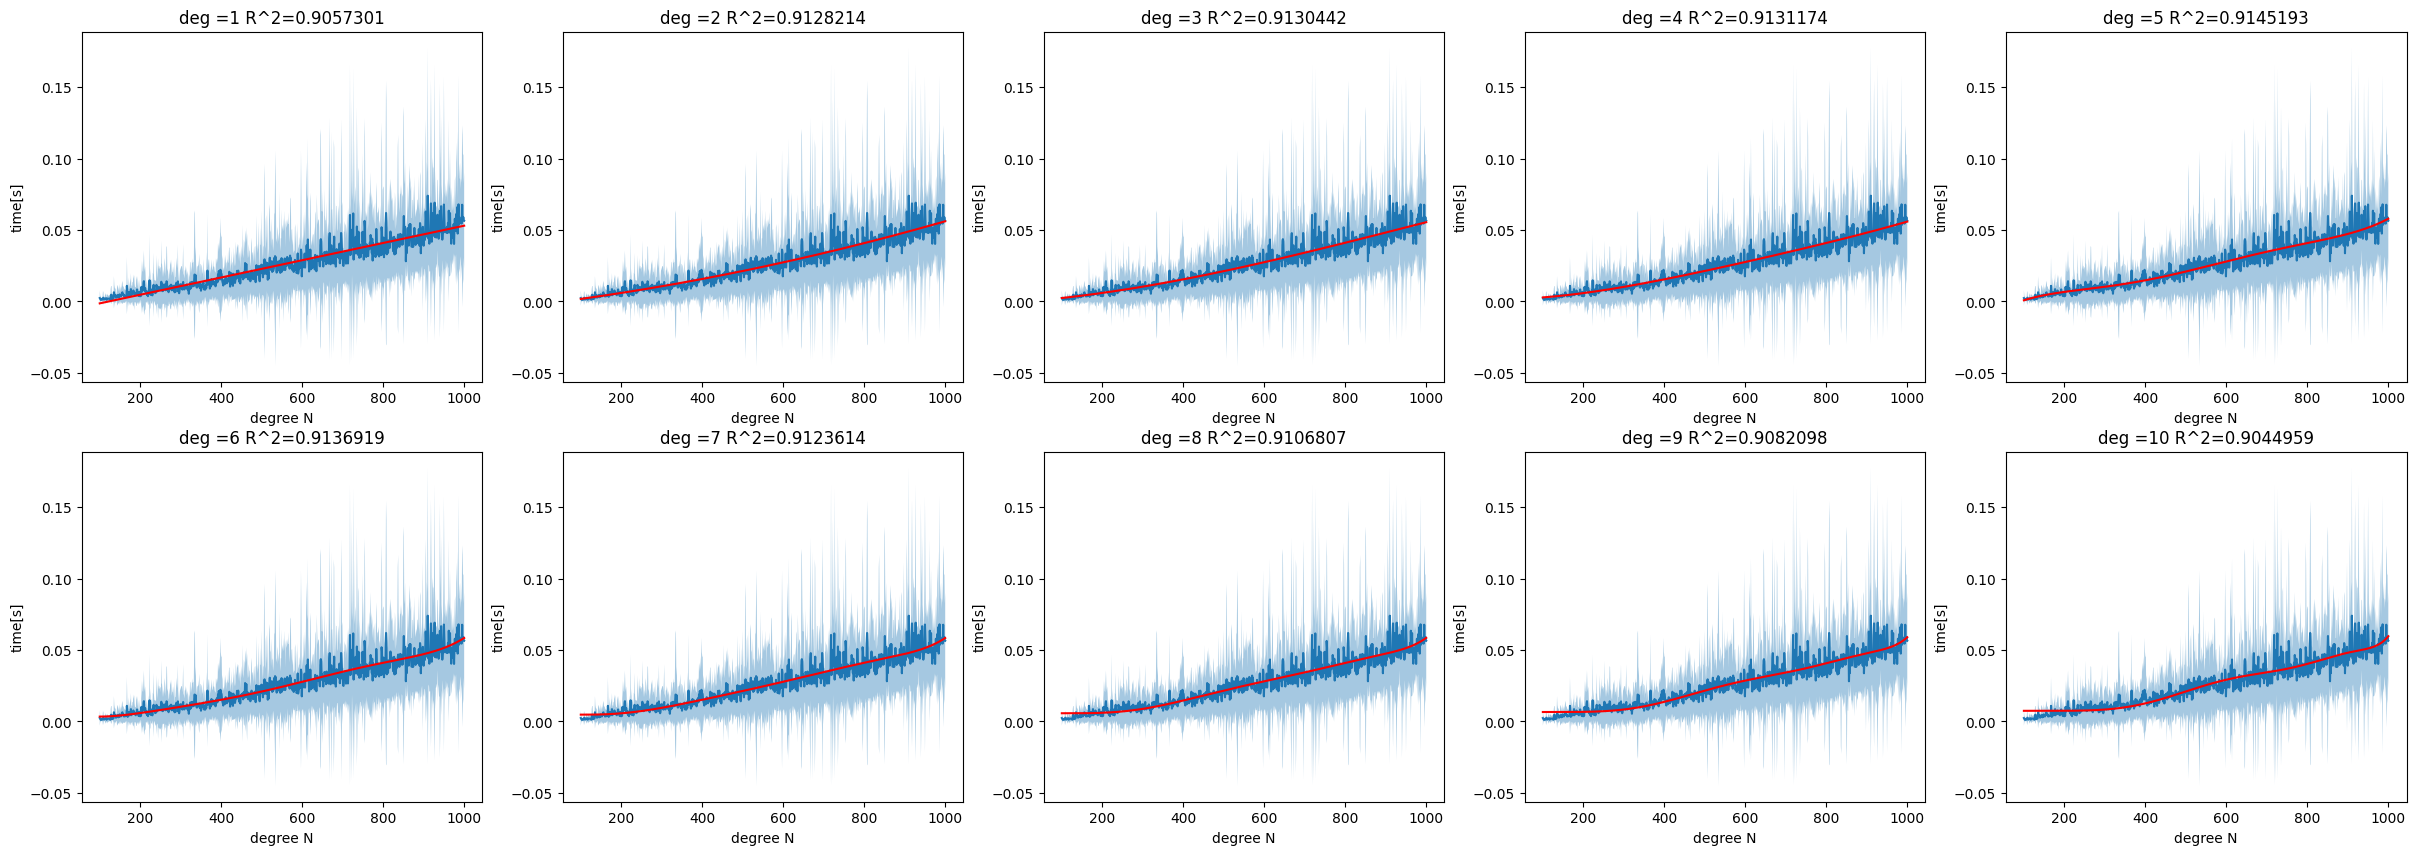

In [89]:
plot_df(det, "det")

(array([6], dtype=int64),)
0.9113728817733588


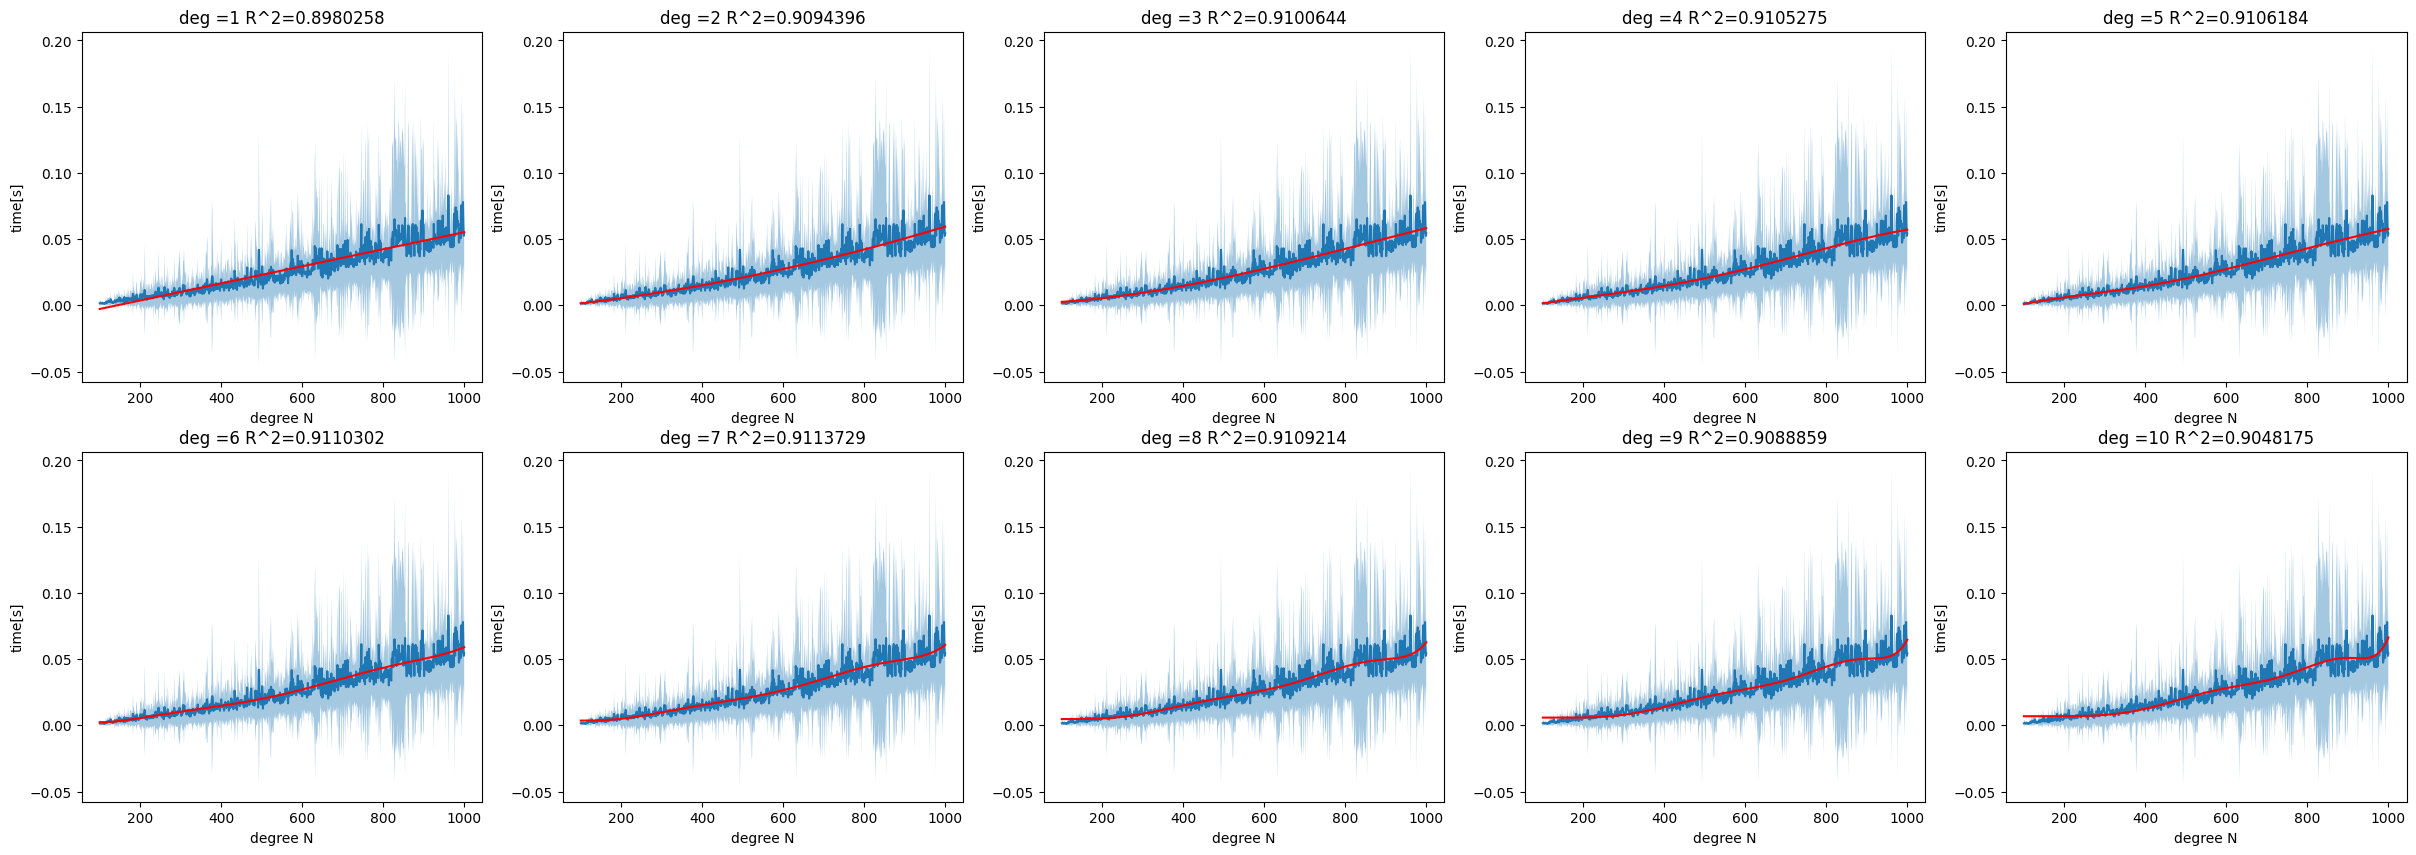

In [90]:
plot_df(sol, "sol")


(array([5], dtype=int64),)
0.9991683717695403


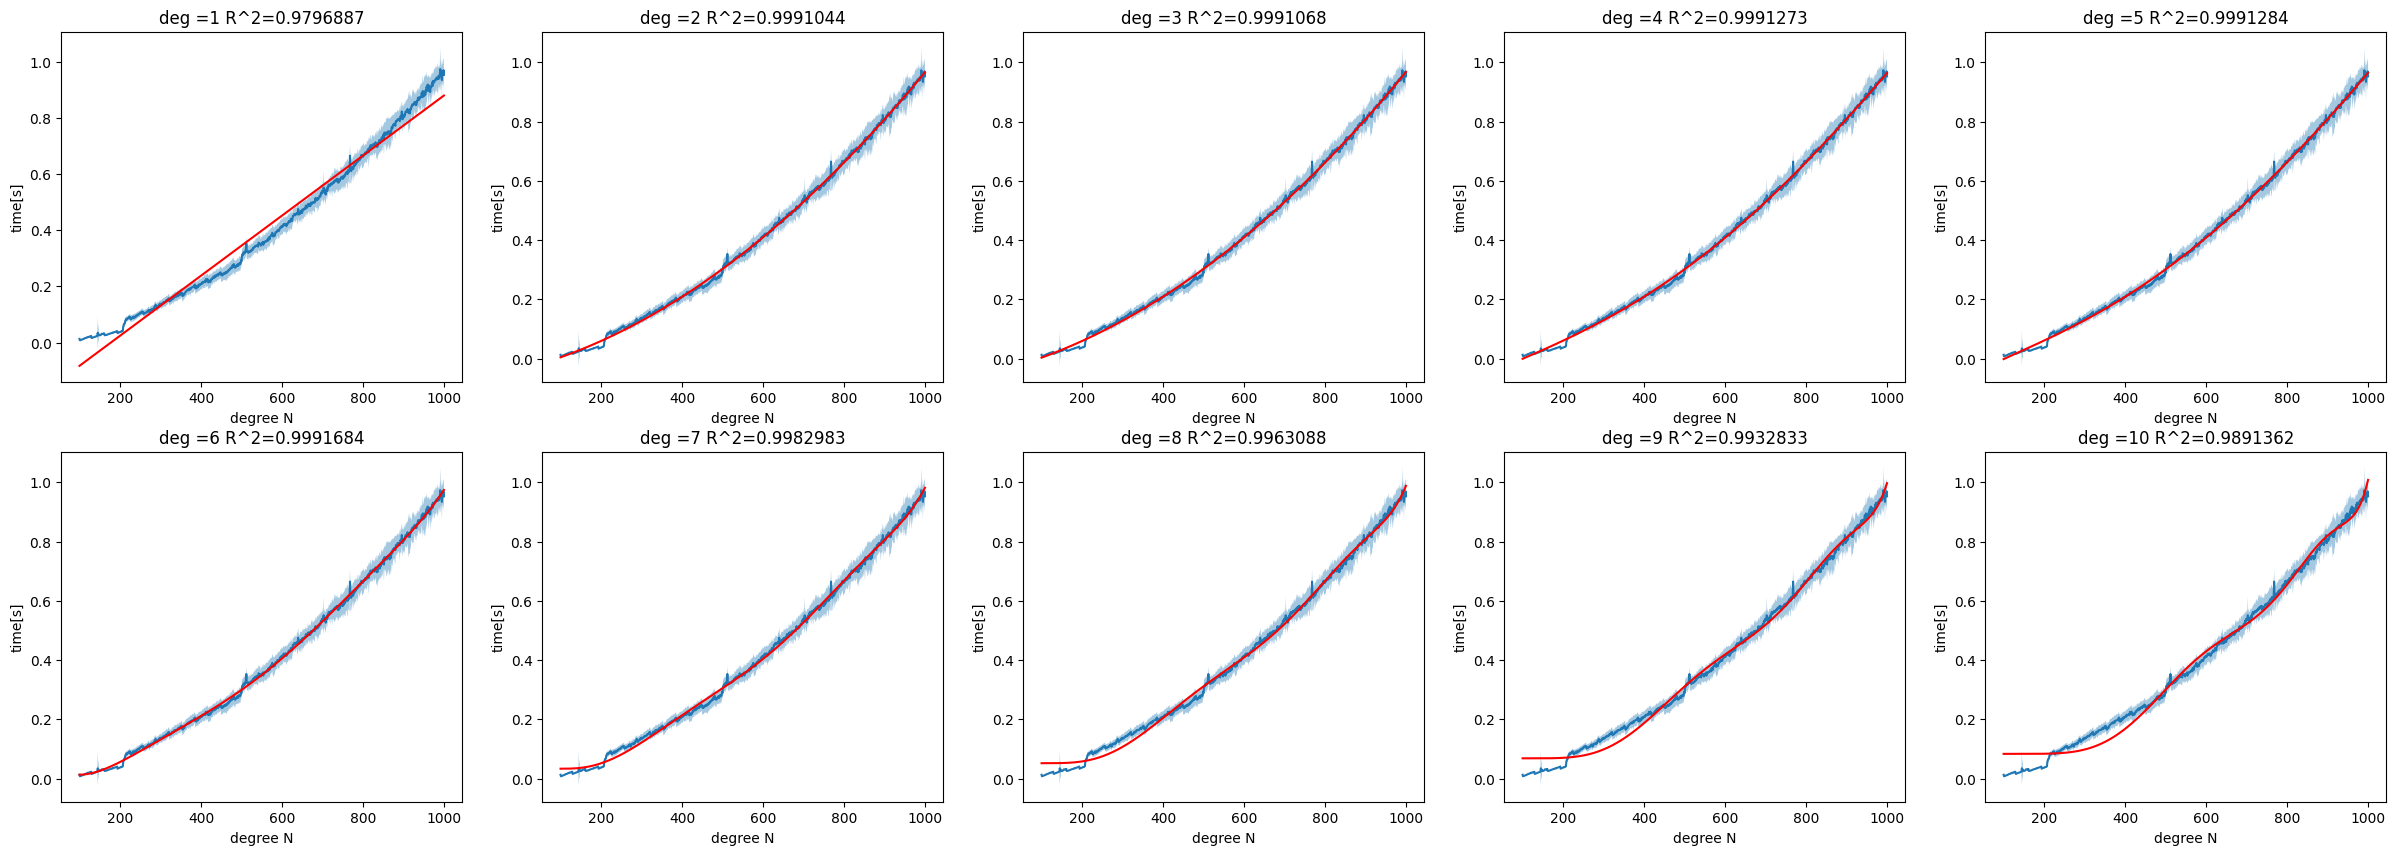

In [91]:
plot_df(eig, "eig")
